In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [3]:
# Load dataset
df = pd.read_csv("housing.csv")

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [5]:
df = df.rename(columns={
    "housing_median_age": "median_age",
    "median_house_value": "price",
})

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   longitude        20640 non-null  float64
 1   latitude         20640 non-null  float64
 2   median_age       20640 non-null  float64
 3   total_rooms      20640 non-null  float64
 4   total_bedrooms   20433 non-null  float64
 5   population       20640 non-null  float64
 6   households       20640 non-null  float64
 7   median_income    20640 non-null  float64
 8   price            20640 non-null  float64
 9   ocean_proximity  20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
df.isnull().sum()

longitude            0
latitude             0
median_age           0
total_rooms          0
total_bedrooms     207
population           0
households           0
median_income        0
price                0
ocean_proximity      0
dtype: int64

In [8]:
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True) 

In [9]:
df.isnull().sum()

longitude          0
latitude           0
median_age         0
total_rooms        0
total_bedrooms     0
population         0
households         0
median_income      0
price              0
ocean_proximity    0
dtype: int64

<Axes: xlabel='households', ylabel='price'>

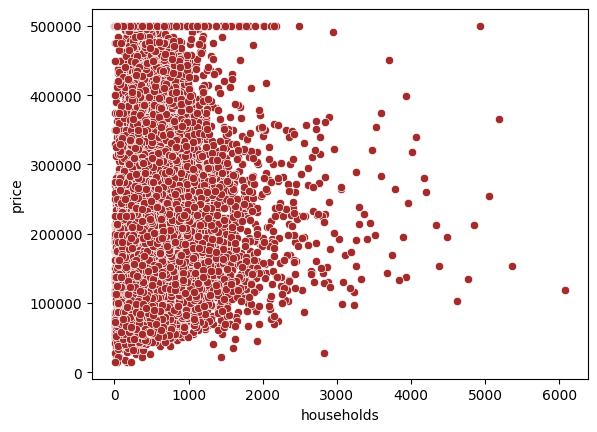

In [10]:
sns.scatterplot(x=df['households'],y=df['price'],color='brown')

<Axes: xlabel='median_income', ylabel='price'>

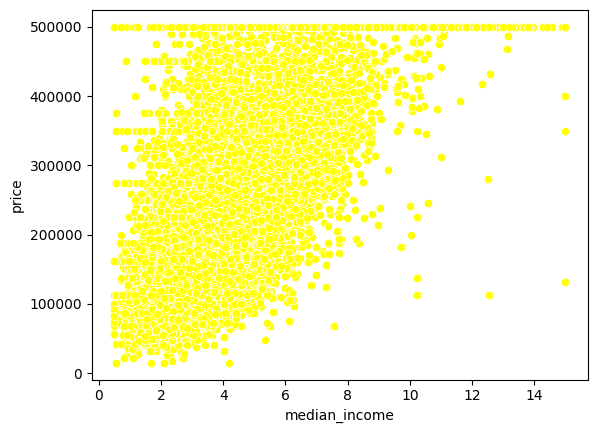

In [11]:
sns.scatterplot(x=df['median_income'],y=df['price'],color='yellow')

In [12]:
df[df['total_bedrooms']>=2800].shape

(90, 10)

In [13]:
df=df[df['total_bedrooms']<2800]

In [14]:
df.shape

(20550, 10)

In [15]:
df[df['total_rooms']>=15000].shape

(31, 10)

In [16]:
df=df[df['total_rooms']<15000]

<Axes: xlabel='total_rooms', ylabel='price'>

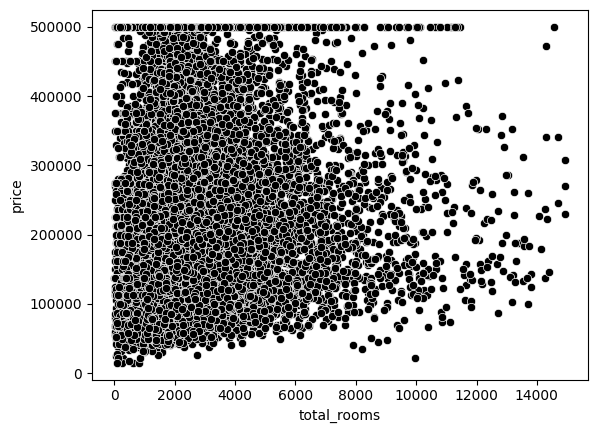

In [17]:
sns.scatterplot(x=df['total_rooms'],y=df['price'],color='black')

In [18]:
df=df[df['population']<6500]

In [19]:
#Dropping unimportant features
df.drop(['longitude','latitude'],axis=1,inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20460 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   median_age       20460 non-null  float64
 1   total_rooms      20460 non-null  float64
 2   total_bedrooms   20460 non-null  float64
 3   population       20460 non-null  float64
 4   households       20460 non-null  float64
 5   median_income    20460 non-null  float64
 6   price            20460 non-null  float64
 7   ocean_proximity  20460 non-null  object 
dtypes: float64(7), object(1)
memory usage: 1.4+ MB


(49, 8)

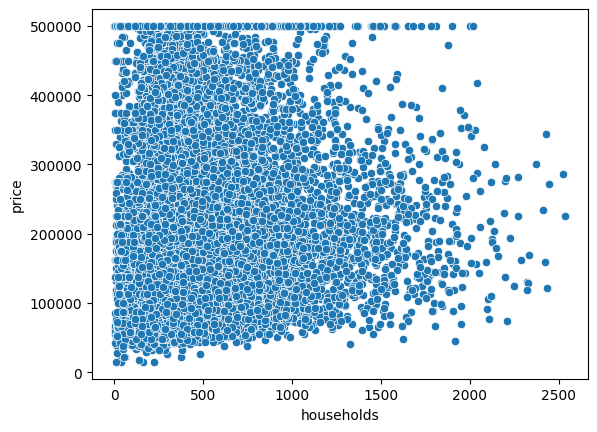

In [21]:
sns.scatterplot(x=df['households'],y=df['price'])
df[df['households']>=2000].shape

In [22]:
df=df[df['households']<2000]

<Axes: xlabel='households', ylabel='price'>

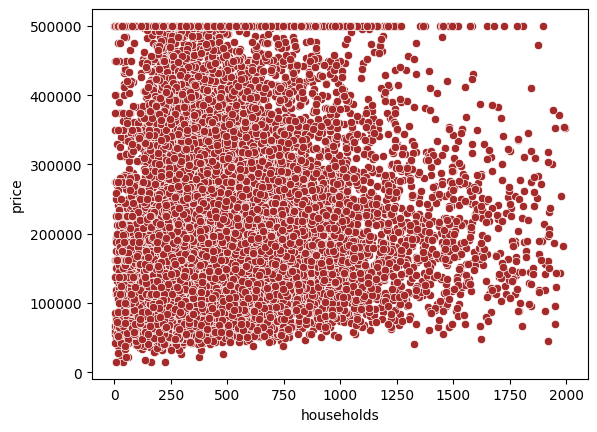

In [23]:
sns.scatterplot(x=df['households'],y=df['price'],color='brown')

In [24]:
x=df[df['median_income']<9]

In [25]:
#Encoding Categorical Features
from sklearn.preprocessing import LabelEncoder

In [26]:
encoder = LabelEncoder()
df['ocean_proximity'] = encoder.fit_transform(df['ocean_proximity'])

In [27]:
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20411 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   median_age       20411 non-null  float64
 1   total_rooms      20411 non-null  float64
 2   total_bedrooms   20411 non-null  float64
 3   population       20411 non-null  float64
 4   households       20411 non-null  float64
 5   median_income    20411 non-null  float64
 6   price            20411 non-null  float64
 7   ocean_proximity  20411 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 1.4 MB


In [29]:
#Transforming our dataset to float
df= df.astype('float')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20411 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   median_age       20411 non-null  float64
 1   total_rooms      20411 non-null  float64
 2   total_bedrooms   20411 non-null  float64
 3   population       20411 non-null  float64
 4   households       20411 non-null  float64
 5   median_income    20411 non-null  float64
 6   price            20411 non-null  float64
 7   ocean_proximity  20411 non-null  float64
dtypes: float64(8)
memory usage: 1.4 MB


In [31]:
X = df.drop("price", axis=1)
y = df["price"]

In [32]:
X.shape

(20411, 7)

In [33]:
from sklearn.preprocessing import PolynomialFeatures
feature = PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)
X = feature.fit_transform(X)

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
x_data = scaler.fit_transform(X)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.25 , random_state=42)


Regression model:

In [36]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred_lin = regressor.predict(X_test)

reg_score = r2_score(y_test , y_pred_lin)
reg_score

0.7146403268286967

Ridge Model:

In [37]:

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print("Ridge RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("Ridge R²:", r2_score(y_test, y_pred_ridge))


Ridge RMSE: 60910.445622492894
Ridge R²: 0.7147877550082402


/Users/mac/opt/anaconda3/envs/venv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.36516e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Lasso Model:

In [38]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

print("LASSO RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("LASSO R²:", r2_score(y_test, y_pred_lasso))

LASSO RMSE: 60169.56698842144
LASSO R²: 0.7216838643916246


/Users/mac/opt/anaconda3/envs/venv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.941e+13, tolerance: 2.061e+10
  model = cd_fast.enet_coordinate_descent(


In [71]:
import pickle
pickle.dump(regressor,open('regressor.pkl','wb'))

In [72]:
import pickle
pickle.dump(ridge,open('ridge.pkl','wb'))

In [73]:
import pickle
pickle.dump(lasso,open('lasso.pkl','wb'))

In [74]:
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

with open("encoder.pkl", "wb") as f:
    pickle.dump(encoder, f)


In [75]:
with open("poly_feature.pkl", "wb") as f:
    pickle.dump(feature, f)